In [729]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [730]:
dataset = pd.read_csv('dataPenjualanBersih.csv')
x = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, -1].values

In [731]:
print(x)
print(y)

[['NMAX 155' 'YMS MAGELANG 3S']
 ['NMAX 155' 'YMS MAGELANG 3S']
 ['NMAX 155' 'YMS MAGELANG 3S']
 ...
 ['AEROX 155 C' 'YMS SANG AJI 3S']
 ['MIO 125 CW' '3S PONOROGO']
 ['ALL NEW VIXION' '3S PONOROGO']]
['TUNAI' 'TUNAI' 'TUNAI' ... 'TUNAI' 'TUNAI' 'TUNAI']


In [732]:
dataset = pd.read_csv('dataPenjualanBersih.csv')
dataset['TYPE_K'] = pd.factorize(dataset.TYPE_K)[0]
dataset['LOKASI'] = pd.factorize(dataset.LOKASI)[0]
x = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, -1].values

In [733]:
print(x)

[[ 0  0]
 [ 0  0]
 [ 0  0]
 ...
 [13 10]
 [19 17]
 [12 17]]


In [734]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [735]:
print(y)

[1 1 1 ... 1 1 1]


In [736]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [737]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [738]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan', p=3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, p=3)

In [739]:
y_pred = classifier.predict(x_test)

In [740]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 84  75]
 [ 62 299]]


C:\Users\dadiw\AppData\Local\Temp\ipykernel_27324\2933174826.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


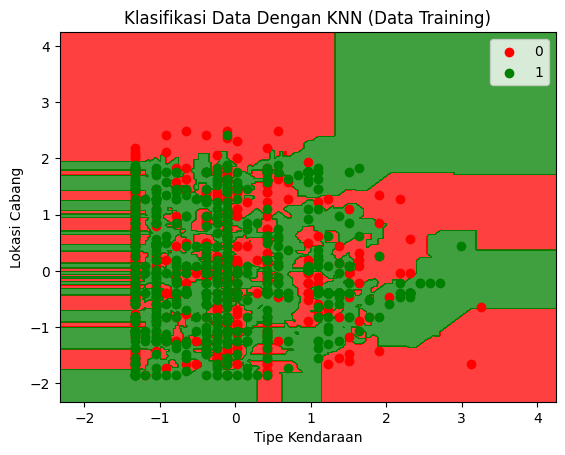

In [741]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x1.min(), x1.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data Dengan KNN (Data Training)')
plt.xlabel('Tipe Kendaraan')
plt.ylabel('Lokasi Cabang')
plt.legend()
plt.show()

C:\Users\dadiw\AppData\Local\Temp\ipykernel_27324\2303965409.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


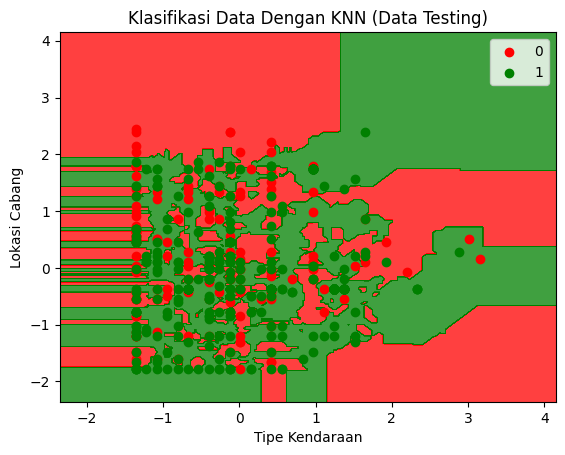

In [742]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x1.min(), x1.max())
for i, j in enumerate (np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data Dengan KNN (Data Testing)')
plt.xlabel('Tipe Kendaraan')
plt.ylabel('Lokasi Cabang')
plt.legend()
plt.show()